# Desafio técnico Dados

### Objetivo

O novo aplicativo de streaming "5GFlix" está com o desafio de fazer estudos de mercado para formular a
estratégia de negócio que irão adotar.
Para uma parte do estudo de mercado, a "5Gflix" precisa fazer análises em cima de filmes e séries que
estão disponíveis na Netflix, a sua concorrente direta.
O CTO da "5Gflix", Alan Turing, entrou em contato com a empresa para construir uma estrutura lógica
que possibilite que o time de BI da "5GFlix" responda a várias perguntas de negócio relacionadas aos
dados das streams de vídeo, que são: <br>
1.1. Quantos filmes estão disponíveis no dataset? <br> 1.2. Qual é o nome dos 5 filmes com melhor média de avaliação? <br> 1.3. Quais os 5 anos com menos lançamentos de filmes? <br> 1.4. Quantos filmes que possuem avaliação maior ou igual a 4.7, considerando apenas os filmes avaliados na última data de avaliação do dataset?  <br> 1.5. Dos filmes encontrados na questão anterior, quais são os 10 filmes com as piores notas e quais as notas? <br> 1.6. Quais os id's dos 5 customer que mais avaliaram filmes e quantas avaliações cada um fez?

### Dataset Utilizados

**Base_01:** https://drive.google.com/file/d/1gLsCjaMrL91ECdThq58cZAzB9tPxG18g/view?usp=sharing <br/>
**Base_02:** https://drive.google.com/file/d/1C_T1w8fc7Oa8MeTo4LMTEcv90IfEOS-6/view?usp=sharing

### Importação das bibliotecas

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
%reload_ext watermark
%watermark -a "Diego Oliveira da Silva" --iversions

Author: Diego Oliveira da Silva

pandas    : 1.4.1
numpy     : 1.19.5
matplotlib: 3.5.1
seaborn   : 0.11.2



### Carregamento dos arquivos

In [150]:
base_de_dados_01 = pd.read_csv("movies.csv", sep = ";", header = None)

In [151]:
base_de_dados_02 = pd.read_csv("customers_rating.csv", sep = ";")

## Análise exploratória e tratamento dos dados

* Primeiramente será necessário realizar uma análise exploratória dos dados que tem como objetivo verificar se o conjunto de dados não possue algum tipo de erro ou dados incorreto. <br>
* A análise a ser realizada será: <br>
    (1) Nomes das colunas<br>
    (2) Tamanho de linhas e colunas<br>
    (3) Tipos de dados do conjunto de dados<br>
    (4) Se contém valores nulos<br>
    (5) Se contém valores duplicados ou não dependendo do dataset

#### **Análise exploratória da base_de_dados_01**

In [152]:
base_de_dados_01.head()

,0,1
0,1,"(Dinosaur Planet, 2003)"
1,2,"(Isle of Man TT 2004 Review, 2004)"
2,3,"(Character, 1997)"
3,4,"(Paula Abdul's Get Up & Dance, 1994)"
4,5,"(The Rise and Fall of ECW, 2004)"


* Devido os titulos das colunas estarem sem o nome dos título, O nome dos títulos das colunas será inserido os titulos por meio da função .columns do pandas;

In [153]:
base_de_dados_01.columns = ["ID","Filme e Ano"]

In [154]:
base_de_dados_01.head()

,ID,Filme e Ano
0,1,"(Dinosaur Planet, 2003)"
1,2,"(Isle of Man TT 2004 Review, 2004)"
2,3,"(Character, 1997)"
3,4,"(Paula Abdul's Get Up & Dance, 1994)"
4,5,"(The Rise and Fall of ECW, 2004)"


* Após a modificação dos títulos, será verificado o tamanho das linhas e colunas do conjunto de dados. Para isso irei usar a funcao .shape do pandas.

In [155]:
base_de_dados_01.shape

(4499, 2)

* Agora será análisado o tipo dos dados de cada coluna para saber se corresponde ao tipo de dado existente no conjunto de dados. Para isso farei uso da função .dtypes do do pandas. 

In [156]:
base_de_dados_01.dtypes

ID              int64
Filme e Ano    object
dtype: object

* Agora irei verificar se existe algum valor faltante nas colunas do conjunto de dados

In [157]:
print(base_de_dados_01.isnull().sum())

ID             0
Filme e Ano    0
dtype: int64


* Agora irei verificar se existe valor duplicado, para isso irei usar a função .duplicated() e irei somar o total desses valores com a função .sum()

In [158]:
base_de_dados_01["Filme e Ano"].duplicated().sum()

1

* Agora que sei que existe um valor duplicado no dataset, irei verificar qual é o dado duplicado através da função .value_counts() que me dá em ordem decrescente qual o valor duplciado.

In [159]:
base_de_dados_01["Filme e Ano"].value_counts()

(Dr. Quinn, 1993)                                           2
(Dinosaur Planet, 2003)                                     1
(Lucia Di Lammermoor: Donizetti: Australian Opera, 1986)    1
(Escanaba in da Moonlight, 2000)                            1
(The Three Stooges: Merry Mavericks, 1951)                  1
                                                           ..
(The Hunchback of Notre Dame, 1999)                         1
(Hand Maid May, 2000)                                       1
(National Lampoon's Van Wilder, 2002)                       1
(Faith Hill: When the Lights Go Down, 2002)                 1
(In My Skin, 2002)                                          1
Name: Filme e Ano, Length: 4498, dtype: int64

#### **Análise exploratória da base_de_dados_02**

* Agora irei realizar os mesmos procedimentos feito para a base de dados 01 na base de dados 02.

In [160]:
base_de_dados_02.head()

,Cust_Id,Rating,Date,Movie_Id
0,1488844,3.0,2005-09-06,1
1,822109,5.0,2005-05-13,1
2,885013,4.0,2005-10-19,1
3,30878,4.0,2005-12-26,1
4,823519,3.0,2004-05-03,1


In [161]:
base_de_dados_02.shape

(24053764, 4)

In [162]:
base_de_dados_02.dtypes

Cust_Id       int64
Rating      float64
Date         object
Movie_Id      int64
dtype: object

In [163]:
base_de_dados_02.isnull().sum()

Cust_Id     0
Rating      0
Date        0
Movie_Id    0
dtype: int64

* Como nesse conjunto de dados sei que tem a necessidade de existir valores iguais em todas as colunas, não irei verificar se existe algum valor duplcado.

### (1) Quantos filmes estão disponíveis no dataset?

* Para responder essa questão vou fazer uso da função .nunique() do pandas e atribuir o resultado a uma nova variável, essa função retorna a quantidade de valores únicos em um dataframe ou série de um conjunto de dados, ou seja, se houver algum dado igual não será contabilizado. Logo;

In [164]:
total_filmes = base_de_dados_01["Filme e Ano"].nunique()

In [165]:
total_filmes

4498

In [166]:
base_de_dados_01.shape

(4499, 2)

* Já tinha encontrado um valor duplicado na base de dados 01, como existe um valor duplicado que é o do filme (Dr. Quinn, 1993), só deve ser contabilizado 1, o valor total foi comprovado através da função .nunique(). Sendo assim:

In [167]:
print("O número total de filmes disponíveis no dataset é: ", total_filmes)

O número total de filmes disponíveis no dataset é:  4498


### (2) Qual é o nome dos 5 filmes com melhor média de avaliação?

* Para responder essa questão vou criar um novo Dataset aonde vou atribuir a ele apenas os dados de avaliação (Rating) e Id do filme (Movie_Id), pois é o que importa para responder essa questão. Além disso, farei uso da função .sort_values do pandas, que tem como objetivo ordenar os dados do dataset, ficando da seguinte forma;

In [168]:
media_filmes = base_de_dados_02.sort_values(by = ["Rating", "Movie_Id"])

* Com o novo dataset criado irei obter a média de avaliação de cada filme com a função .groupby e em seguida irei ordenar esse conjunto de dados com a função .sort_values(), obtendo o resultado em ordem crescente.

In [169]:
media_total_filmes = media_filmes.groupby("Movie_Id")["Rating"].mean()

In [170]:
media_total_filmes = media_total_filmes.sort_values()

In [171]:
media_total_filmes

Movie_Id
515     1.287879
3575    1.400000
2426    1.452381
4202    1.487395
1227    1.496241
          ...   
13      4.552000
4238    4.554434
2102    4.581296
3033    4.586364
3456    4.670989
Name: Rating, Length: 4499, dtype: float64

* Agora que já foi dados os Ids com as maiores pontuações, basta verificar quais são na base_de_dados_01 para saber quais são os filmes melhores avaliados, para isso irei fazer uso da função iloc[] que tem como objetivo obter o valor de uma linha especifica através do índice dessa linha. Logo;

In [172]:
media_primeiro = base_de_dados_01.iloc[3456]["Filme e Ano"]

In [173]:
media_segundo = base_de_dados_01.iloc[3033]["Filme e Ano"]

In [174]:
media_terceiro = base_de_dados_01.iloc[2102]["Filme e Ano"]

In [175]:
media_quarto = base_de_dados_01.iloc[4238]["Filme e Ano"]

In [176]:
media_quinto = base_de_dados_01.iloc[13]["Filme e Ano"]

In [177]:
print("Os cinco filmes melhores avaliados são: \n primeiro: {}, \n Segundo: {}, \n Terceiro: {},\n Quarto: {}, \n Quinto: {}.".format(media_primeiro,media_segundo,media_terceiro,media_quarto,media_quinto))

Os cinco filmes melhores avaliados são: 
 primeiro: (Slapstick Symposium: The Harold Lloyd Collection, 1920), 
 Segundo: (The Partridge Family: Season 1, 1970), 
 Terceiro: (Sunshine, 1999),
 Quarto: (Maitresse, 1973), 
 Quinto: (Nature: Antarctica, 1982).


### (3) Quais os 5 anos com menos lançamentos de filmes?

* Inicialmente para obter apenas a data de lançamento de cada filme será criado um novo dataset com base na base 01 para obter separadamente a data de lançamento de cada filme, para isso irei fazer o seguinte;

In [178]:
base_dados_data = pd.read_csv("movies.csv", sep = ",", header = None)

In [179]:
base_dados_data.head()

,0,1
0,1;(Dinosaur Planet,2003)
1,2;(Isle of Man TT 2004 Review,2004)
2,3;(Character,1997)
3,4;(Paula Abdul's Get Up & Dance,1994)
4,5;(The Rise and Fall of ECW,2004)


In [180]:
base_dados_data.columns = ["Filme", "Ano de Lançamento"]

In [181]:
base_dados_data.head()

,Filme,Ano de Lançamento
0,1;(Dinosaur Planet,2003)
1,2;(Isle of Man TT 2004 Review,2004)
2,3;(Character,1997)
3,4;(Paula Abdul's Get Up & Dance,1994)
4,5;(The Rise and Fall of ECW,2004)


* Após obter o ano de lançamento do filme em uma coluna separada, irei retirar o caracter ")" dos dados da coluna Ano de lançamento, para isso farei uso da função .str.replace() que tem como objetivo retirar ou substituir um caracter específico de uma coluna, sendo assim;

In [182]:
base_dados_data["Ano de Lançamento"] = base_dados_data["Ano de Lançamento"].str.replace(")","")

/tmp/ipykernel_4523/517218806.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_dados_data["Ano de Lançamento"] = base_dados_data["Ano de Lançamento"].str.replace(")","")


In [183]:
base_dados_data.head()

,Filme,Ano de Lançamento
0,1;(Dinosaur Planet,2003
1,2;(Isle of Man TT 2004 Review,2004
2,3;(Character,1997
3,4;(Paula Abdul's Get Up & Dance,1994
4,5;(The Rise and Fall of ECW,2004


* Agora será verificado inicialmente o tipo de dados de cada coluna para saber se está com tipo de dado adequado, fazendo uso da função .dtypes, logo;

In [184]:
base_dados_data.dtypes

Filme                object
Ano de Lançamento    object
dtype: object

* Após verificar o tipo de dados de cada coluna do dataset, percebi que a coluna Ano de Lançamento está no tipo object. Irei fazer a converção para o tipo int com a função .astype do numpy, ficando assim; 

In [185]:
base_dados_data["Ano de Lançamento"] = base_dados_data["Ano de Lançamento"].astype(np.int,copy = False)

In [186]:
base_dados_data.dtypes

Filme                object
Ano de Lançamento     int64
dtype: object

* Após modificar o tipo de dado para int, irei contabilizar o ano de lançamento colocando em ordem decrescente, assim saberei quais os anos que tiveram menos lançamento de filmes

In [187]:
base_dados_data = base_dados_data.sort_values(by = ["Filme", "Ano de Lançamento"])

In [188]:
base_dados_data["Ano de Lançamento"].value_counts().tail()

1918    2
1915    1
1926    1
1922    1
1917    1
Name: Ano de Lançamento, dtype: int64

* Após ter colocando em ordem com a função .sort_values e ter contabilizado a quantidade de filmes por ano com a função .value_counts(), Sei quais os anos com menos filmes lançados, sendo estes: 

In [189]:
print("Os 5 anos com menos filmes lançando são: \n 1915 com 1 filme lançado, \n 1917 com 1 filme lançado, \n 1922 com 1 filme lançado, \n 1926 com 1 filme lançado, \n 1918 com 2 filmes laçandos. ")

Os 5 anos com menos filmes lançando são: 
 1915 com 1 filme lançado, 
 1917 com 1 filme lançado, 
 1922 com 1 filme lançado, 
 1926 com 1 filme lançado, 
 1918 com 2 filmes laçandos. 


### (4) Quantos filmes que possuem avaliação maior ou igual a 4.7, considerando apenas os filmes avaliados na última data de avaliação do dataset?

* Para responder a quarta questão reutilizarei o dataset criado na segunda questão

In [190]:
base_de_dados_02.head()

,Cust_Id,Rating,Date,Movie_Id
0,1488844,3.0,2005-09-06,1
1,822109,5.0,2005-05-13,1
2,885013,4.0,2005-10-19,1
3,30878,4.0,2005-12-26,1
4,823519,3.0,2004-05-03,1


* Agora irei criar um novo dataset obtendo apenas as colunas que interessão e irei realizar a ordenação dessas colunas, sendo estas;

In [191]:
media_avaliacao = base_de_dados_02[["Rating","Date","Movie_Id"]]

In [192]:
media_avaliacao

,Rating,Date,Movie_Id
0,3.0,2005-09-06,1
1,5.0,2005-05-13,1
2,4.0,2005-10-19,1
3,4.0,2005-12-26,1
4,3.0,2004-05-03,1
...,...,...,...
24053759,2.0,2005-02-16,4499
24053760,2.0,2005-02-10,4499
24053761,5.0,2005-07-27,4499
24053762,3.0,2005-12-20,4499


* Agora irei ordenar os dados do dataset.

In [193]:
media_avaliacao = media_avaliacao.sort_values(by = ["Rating", "Date","Movie_Id"])

In [194]:
media_avaliacao

,Rating,Date,Movie_Id
254722,1.0,1999-12-09,55
14342911,1.0,1999-12-09,2780
3529069,1.0,1999-12-16,674
16438032,1.0,1999-12-16,3168
21447378,1.0,1999-12-16,4031
...,...,...,...
24042806,5.0,2005-12-31,4495
24043825,5.0,2005-12-31,4496
24048123,5.0,2005-12-31,4496
24048514,5.0,2005-12-31,4496


* Para obter apenas os dados relevantes para responder a questão, será verificado qual a ultima data de avaliação e, em seguida, será filtrada apenas os valores referente a essa data.

In [195]:
media_avaliacao["Date"] = pd.to_datetime(media_avaliacao["Date"])

In [196]:
avaliacao_media = media_avaliacao.loc[(media_avaliacao["Date"].dt.year == 2005)]

In [197]:
avaliacao_media = avaliacao_media.loc[(avaliacao_media["Date"].dt.month == 12)]

In [198]:
avaliacao_media = avaliacao_media.loc[avaliacao_media["Date"].dt.day == 31]

* Agora que obtive os dados referente ao ultimo dia de avaliação do conjunto de dados irei verificar a media de avaliação através de um novo conjunto de dados.

In [199]:
quantidade_total = avaliacao_media.groupby("Movie_Id")["Rating"].mean().value_counts()

In [200]:
quantidade_total 

4.000000    314
3.000000    279
5.000000    183
2.000000     80
3.500000     58
           ... 
3.875000      1
3.627119      1
4.210526      1
3.658537      1
3.729167      1
Name: Rating, Length: 192, dtype: int64

* Como o conjunto de dados que obtive foi uma Série e não um dataframe, irei realizar a conversão para um dataframe através da função .to_frame() do pandas. 

In [201]:
quantidade_total = quantidade_total.to_frame(name = "Quantidade de avaliações")

In [202]:
quantidade_total

,Quantidade de avaliações
4.000000,314
3.000000,279
5.000000,183
2.000000,80
3.500000,58
...,...
3.875000,1
3.627119,1
4.210526,1
3.658537,1


* Como uma das colunas se tornou índice na conversão para dataframe, irei transformar o índice em coluna com a função .reset_index()

In [203]:
quantidade_total = quantidade_total.reset_index()

In [204]:
quantidade_total

,index,Quantidade de avaliações
0,4.000000,314
1,3.000000,279
2,5.000000,183
3,2.000000,80
4,3.500000,58
...,...,...
187,3.875000,1
188,3.627119,1
189,4.210526,1
190,3.658537,1


* Agora irei atribuir os nomes adequados as colunas do conjunto de dados.

In [205]:
quantidade_total.columns = ["Nota da Avaliação","Quantidade de avaliações"]

In [206]:
quantidade_total

,Nota da Avaliação,Quantidade de avaliações
0,4.000000,314
1,3.000000,279
2,5.000000,183
3,2.000000,80
4,3.500000,58
...,...,...
187,3.875000,1
188,3.627119,1
189,4.210526,1
190,3.658537,1


* Agora irei obter os valores correspondentes a uma média de avaliação superior ou igual a 4.7.

In [207]:
total = (quantidade_total["Nota da Avaliação"] >= 4.7)

In [208]:
total = quantidade_total[total]

In [209]:
total

,Nota da Avaliação,Quantidade de avaliações
2,5.000000,183
26,4.750000,7
56,4.875000,2
67,4.800000,2
124,4.714286,1


* Agora irei somar os valores obtidos e terei o resultado

In [210]:
total = total["Quantidade de avaliações"].sum()

In [211]:
print("Considerando apenas a última data de avaliação, o conjunto de dados possue uma quatidade de {} avaliações com média igual ou superior 4.7." .format(total))

Considerando apenas a última data de avaliação, o conjunto de dados possue uma quatidade de 195 avaliações com média igual ou superior 4.7.


### (5) Dos filmes encontrados na questão anterior, quais são os 10 filmes com as piores notas e quais as notas?

* Para responder essa questão irei criar um novo dataset a partir do dataset (avaliacao_media) já criado anteriormente e obter a média das avaliações por filme.

In [212]:
piores_filmes = avaliacao_media.groupby("Movie_Id")["Rating"].mean()

In [213]:
piores_filmes

Movie_Id
8       3.666667
12      3.000000
16      5.000000
18      2.500000
25      4.000000
          ...   
4489    5.000000
4492    2.000000
4493    4.000000
4495    4.500000
4496    4.428571
Name: Rating, Length: 1588, dtype: float64

* Agora irei transformar a série em dataframe e colocar o índice como coluna, já que o valor do Id do filme quando convertido para dataframe se tornou índice, sendo assim;

In [214]:
piores_filmes = piores_filmes.to_frame(name = "media avaliacao")

In [215]:
piores_filmes = piores_filmes.reset_index()

In [216]:
piores_filmes

,Movie_Id,media avaliacao
0,8,3.666667
1,12,3.000000
2,16,5.000000
3,18,2.500000
4,25,4.000000
...,...,...
1583,4489,5.000000
1584,4492,2.000000
1585,4493,4.000000
1586,4495,4.500000


* Agora irei obter os dados dos filmes com media superior ou igual a 4.7.

In [217]:
total_filmes = (piores_filmes["media avaliacao"] >= 4.7)

In [218]:
total_filmes = piores_filmes[total_filmes]

In [219]:
total_filmes

,Movie_Id,media avaliacao
2,16,5.00
12,52,5.00
13,55,5.00
26,116,5.00
28,121,5.00
...,...,...
1554,4400,5.00
1558,4407,5.00
1559,4409,4.75
1566,4427,5.00


* Agora irei obter os valores ordenados em ordem crescente e terei a resposta dos 10 filmes através da função .head()

In [220]:
total_filmes = total_filmes.sort_values(by = ["media avaliacao"])

In [221]:
total_filmes.head(10)

,Movie_Id,media avaliacao
1208,3446,4.714286
1559,4409,4.750000
910,2585,4.750000
726,2129,4.750000
664,1947,4.750000
1248,3551,4.750000
613,1800,4.750000
419,1208,4.750000
244,677,4.800000
1530,4353,4.800000


* Com a função .iloc irei obter o nome dos filmes através do Id.

In [222]:
primeiro_pior_avaliado = base_de_dados_01.iloc[3446]["Filme e Ano"]

In [223]:
segundo_pior_avaliado = base_de_dados_01.iloc[4409]["Filme e Ano"]

In [224]:
terceiro_pior_avaliado = base_de_dados_01.iloc[2585]["Filme e Ano"]

In [225]:
quarto_pior_avaliado = base_de_dados_01.iloc[2129]["Filme e Ano"]

In [226]:
quinto_pior_avaliado = base_de_dados_01.iloc[1947]["Filme e Ano"]

In [227]:
sexto_pior_avaliado = base_de_dados_01.iloc[3551]["Filme e Ano"]

In [228]:
setimo_pior_avaliado = base_de_dados_01.iloc[1800]["Filme e Ano"]

In [229]:
oitavo_pior_avaliado = base_de_dados_01.iloc[1208]["Filme e Ano"]

In [230]:
nono_pior_avaliado = base_de_dados_01.iloc[667]["Filme e Ano"]

In [231]:
decimo_pior_avaliado = base_de_dados_01.iloc[4353]["Filme e Ano"]

In [232]:
print("Dos filmes da questão anterior os piores avaliados foram: \n Primeiro: {} com uma avaliação de 4.714286, \n \n Segundo: {} com uma avaliação de 4.750000, \n \n Terceiro: {} com uma avaliação de 4.750000, \n \n Quarto: {} com uma avaliação de 4.750000, \n \n Quinto: {} com uma avaliação de 4.750000, \n \n Sexto: {} com uma avaliação de 4.750000, \n \n Sétimo: {} com uma avaliação de 4.750000, \n \n Oitavo: {} com uma avaliação de 4.750000, \n \n Nono: {} com uma avaliação de 4.800000, \n \n Décimo: {} com uma avaliação de 4.800000." .format(primeiro_pior_avaliado,segundo_pior_avaliado,terceiro_pior_avaliado,quarto_pior_avaliado,quinto_pior_avaliado,sexto_pior_avaliado,setimo_pior_avaliado,oitavo_pior_avaliado,nono_pior_avaliado,decimo_pior_avaliado))

Dos filmes da questão anterior os piores avaliados foram: 
 Primeiro: (Face the Evil, 1997) com uma avaliação de 4.714286, 
 
 Segundo: (Live from Bonnaroo 2004, 2004) com uma avaliação de 4.750000, 
 
 Terceiro: (The Game of Death, 2000) com uma avaliação de 4.750000, 
 
 Quarto: (Citizen X, 1998) com uma avaliação de 4.750000, 
 
 Quinto: (Beau Travail, 1999) com uma avaliação de 4.750000, 
 
 Sexto: (Dirt Merchant, 1998) com uma avaliação de 4.750000, 
 
 Sétimo: (That Darn Cat, 1965) com uma avaliação de 4.750000, 
 
 Oitavo: (Swashbuckler, 1976) com uma avaliação de 4.750000, 
 
 Nono: (Saturday Night Live: The Best of Will Ferrell 2, 2004) com uma avaliação de 4.800000, 
 
 Décimo: (Fever Pitch, 1997) com uma avaliação de 4.800000.


### (6) Quais os id's dos 5 customer que mais avaliaram filmes e quantas avaliações cada um fez?

* Para responder essa questão irei criar um novo dataset a partir do dataset (base_de_dados_02) obtendo apenas as colunas relevantes para a resolução da questão.

In [233]:
cust_id = base_de_dados_02[["Cust_Id","Rating"]]

In [234]:
cust_id

,Cust_Id,Rating
0,1488844,3.0
1,822109,5.0
2,885013,4.0
3,30878,4.0
4,823519,3.0
...,...,...
24053759,2591364,2.0
24053760,1791000,2.0
24053761,512536,5.0
24053762,988963,3.0


* Irei ordenar os valores do dataset e verificarei o valor total de avaliação de cada customer com obetivo saber quais Custumers avaliaram com maior frequência.

In [235]:
cust_id = cust_id.sort_values(by = ["Rating"])

In [236]:
cust_id.value_counts()

Cust_Id  Rating
2439493  1.0       3851
305344   1.0       2416
1639792  1.0       2139
1461435  1.0       2068
1664010  5.0       2060
                   ... 
2278515  5.0          1
         4.0          1
395707   2.0          1
2278512  2.0          1
1774204  2.0          1
Length: 1819556, dtype: int64

* Agora irei criar um novo dataset contabilizando as avaliações que cada Customer fez, em seguida irei ordenar os valores para obter o resultado final.

In [237]:
frequencia = cust_id.groupby("Cust_Id")["Rating"].count()

In [238]:
frequencia

Cust_Id
6          153
7          195
8           21
10          49
25           4
          ... 
2649404     12
2649409     10
2649421      3
2649426     74
2649429     62
Name: Rating, Length: 470758, dtype: int64

In [239]:
frequencia = frequencia.sort_values()

In [240]:
final = frequencia.tail()

In [241]:
final = final.to_frame(name = "Total de avaliacoes")

In [242]:
final = final.reset_index()

In [243]:
final

,Cust_Id,Total de avaliacoes
0,2118461,3769
1,1664010,4019
2,2439493,4195
3,387418,4422
4,305344,4467


In [244]:
ids = ["305344","387418","2439493","1664010","2118461"]

In [245]:
total_avaliacoes = [4467,4422,4195,4019,3769]

In [246]:
print("Os Ids que mais avaliaram foram: \n Primeiro: 305344 com 4467 avaliações, \n Segundo: 387418 com 4422 avaliações, \n Terceiro: 2439493 com 4195 avaliações, \n Quarto: 1664010 com 4019 avaliações, \n Quint: 2118461 com 3769 avaliações.")

Os Ids que mais avaliaram foram: 
 Primeiro: 305344 com 4467 avaliações, 
 Segundo: 387418 com 4422 avaliações, 
 Terceiro: 2439493 com 4195 avaliações, 
 Quarto: 1664010 com 4019 avaliações, 
 Quint: 2118461 com 3769 avaliações.


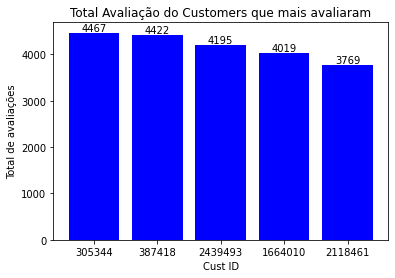

In [247]:
plt.bar(ids, total_avaliacoes, color="blue")
plt.title("Total Avaliação do Customers que mais avaliaram")
plt.ylabel("Total de avaliações")
plt.xlabel("Cust ID")

for x,y in zip(ids,total_avaliacoes):
    plt.text(x,y, "%d" % y,  ha = "center",va = "bottom")

# Análise estatística

* O desenvolvimento de uma análise estatística pode originar insights que podem gerar valor. Para isso irei desenvolver algumas funções que tem como objetivo automatizar o processo de criação de alguns gráficos com o objetivo de facilitar a visualização para tomada de decisão. <br> Irei desenvolver 4 funções, uma para retirar os outliers do gráfico boxplot, um para a criação de um diagrama de caixa, outro para a criação de um histograma e, por fim, um para o gráfico de barras.

In [652]:
def limites(coluna):
    quartil_01 = coluna.quantile(0.25)
    quartil_03 = coluna.quantile(0.75)
    amplitude = quartil_03 - quartil_01
    limite_inferior = quartil_01 - 1.5 * amplitude
    limite_superior = quartil_03 + 1.5 * amplitude
    return limite_inferior, limite_superior

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x = coluna, ax = ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x = coluna, ax = ax2)

def histograma(coluna):
    plt.figure(figsize = (15, 5))
    sns.distplot(coluna, hist = True)
    
def grafico_barra(coluna):
    plt.figure(figsize = (15, 5))
    sns.barplot(x = coluna.value_counts().index, y = coluna.value_counts())

/home/diego/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


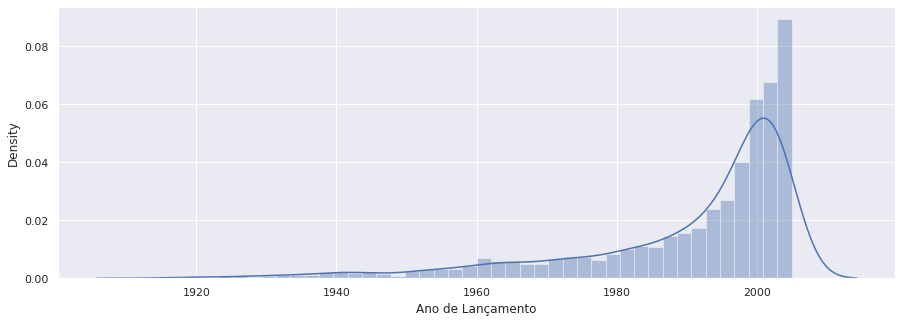

In [653]:
histograma(base_dados_data["Ano de Lançamento"])

* Irei criar um boxplot da base_dados_data para verificar aonde estão concentrados a os dados referentes aos filmes lançados por ano.

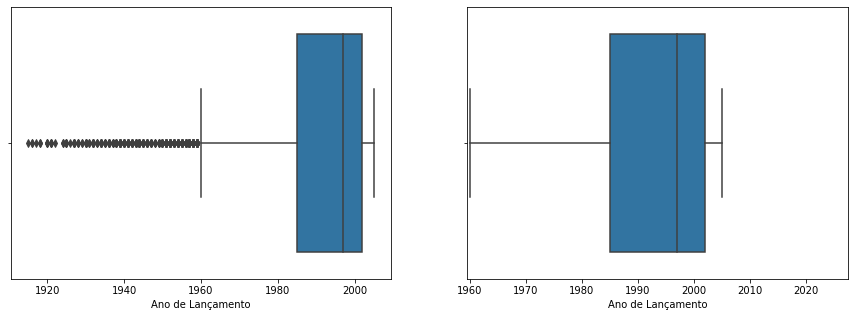

In [250]:
diagrama_caixa(base_dados_data["Ano de Lançamento"])

In [712]:
base_dados_data_numero = base_dados_data.groupby("Ano de Lançamento")["Filme"].count()

Ano de Lançamento
1915      1
1916      2
1917      1
1918      2
1920      3
       ... 
2001    294
2002    329
2003    328
2004    361
2005    132
Name: Filme, Length: 89, dtype: int64

<AxesSubplot:xlabel='Ano de Lançamento', ylabel='Filme'>

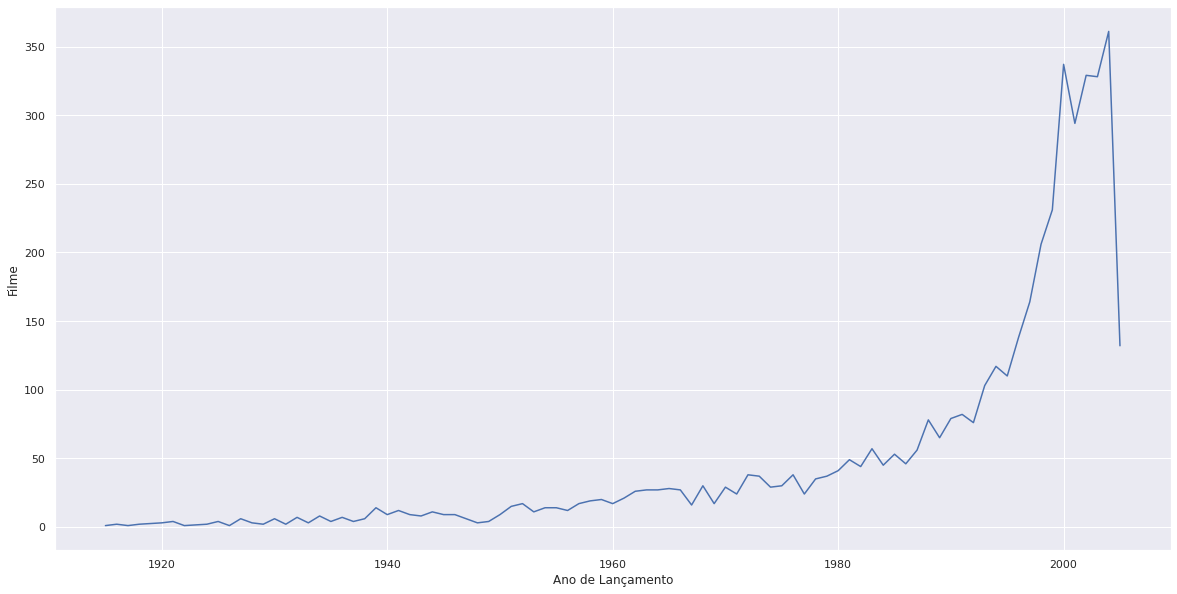

In [716]:
plt.figure(figsize=(20,10))
sns.lineplot(data = base_dados_data_numero)